In [1]:
%precision %g
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from math import sqrt, pi, sin, cos, floor, exp
#from cmath import exp
import numpy as np
from numpy import linalg as LA
from scipy import constants as con
import matplotlib.pyplot as plt

# CP 8.1 Low pass filter

A simple RC circuit can act as a low pass filter. This problem looks at the output voltage relative to varying the input as a function of time (a square wave specifically) according to

$$V_\text{in}(t) = \begin{cases}
    1  & \quad\mbox{if } \lfloor 2t \rfloor \mbox{ is even,} \\
    -1 & \quad\mbox{if } \lfloor 2t \rfloor \mbox{ is odd.}
    \end{cases}$$
    
Combining Ohm's Laws with rules for converting capacitances to voltages, we can solve the ODE

$${\text{d} V_\textrm{out}\over\text{d} t} = {1\over RC}
                               \bigl( V_\textrm{in} - V_\textrm{out} \bigr).$$
                              
using the fourth order Runge-Kutta method.

In [2]:
def Vin(t):
    """Calculates function as defined above"""

    if floor(2*t) % 2 == 0:
        y = 1
    elif floor(2*t)%2 == 1:
        y = -1
    return y

def f(x,t):
    return (1/(RC)) * (Vin(t) - x)

a = 0.0
b = 10.0
N = 1e5
h = (b-a)/N

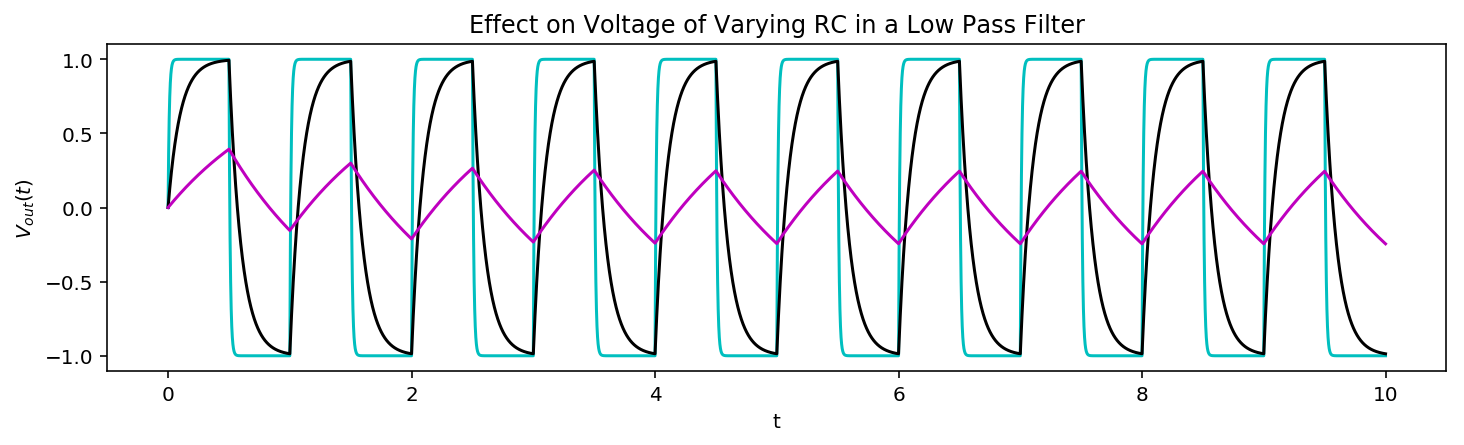

In [3]:
"""Plots V_out for different RC values in a table of plots"""
fig1, ax1 = plt.subplots(1, 1, figsize = (12, 3))

RC = 0.01

tpoints = np.arange(a,b,h)
Vout_points = []
x = 0.0

for t in tpoints:
    Vout_points.append(x)
    k1 = h * f(x, t)
    k2 = h * f(x +0.5*k1, t +0.5*h)
    k3 = h * f(x +0.5*k2, t +0.5*h)
    k4 = h * f(x +k3, t +h)
    x += (k1 + 2*k2 + 2*k3 + k4) / 6
    
ax1.plot(tpoints, Vout_points, 'c',label='$RC=0.01$')


RC = 0.1

tpoints = np.arange(a,b,h)
Vout_points = []
x = 0.0

for t in tpoints:
    Vout_points.append(x)
    k1 = h * f(x, t)
    k2 = h * f(x +0.5*k1, t +0.5*h)
    k3 = h * f(x +0.5*k2, t +0.5*h)
    k4 = h * f(x +k3, t +h)
    x += (k1 + 2*k2 + 2*k3 + k4) / 6
    
ax1.plot(tpoints, Vout_points, 'k',label='$RC=0.1$')


RC = 1

tpoints = np.arange(a,b,h)
Vout_points = []
x = 0.0

for t in tpoints:
    Vout_points.append(x)
    k1 = h * f(x, t)
    k2 = h * f(x +0.5*k1, t +0.5*h)
    k3 = h * f(x +0.5*k2, t +0.5*h)
    k4 = h * f(x +k3, t +h)
    x += (k1 + 2*k2 + 2*k3 + k4) / 6
    
ax1.plot(tpoints, Vout_points, 'm',label='$RC=1.0$')



ax1.set_xlabel("t")
ax1.set_ylabel("$V_{out}(t)$")
ax1.set_title("Effect on Voltage of Varying RC in a Low Pass Filter")
plt.show()

I ended up using a value of $h = 10^{-4}.$ We can see that the circuit's voltage is periodic. This corresponds to $V_{in}$ changing as a square wave and effecting which way the current is being driven from the capacitor. The time constant for the circuit $\tau = RC,$ which means that the voltage decays as $\tfrac{1}{RC}.$ This is why the output voltage is so similar to the input voltage (the square wave). As $RC$ increases, the capacitor does not fully charge or discharge.

# CP 8.2 The Lotka-Volterra Equations

The populations of a predator-prey system (foxes and rabbits, in this case) can be modeled as ODEs dependent on the sizes of a species' own populations and the other species' population. In this case, we have the two equations

$${\text{d} x\over\text{d} t} = \alpha x - \beta xy \qquad \text{ and } \qquad {\text{d} y\over\text{d} t} = \gamma xy - \delta y.$$

Here we measure the population in thousands. Our initial conditions are

$$x = y = 2, \qquad \alpha = 1, \qquad \beta = \gamma = 0.5, \qquad \delta = 2.$$

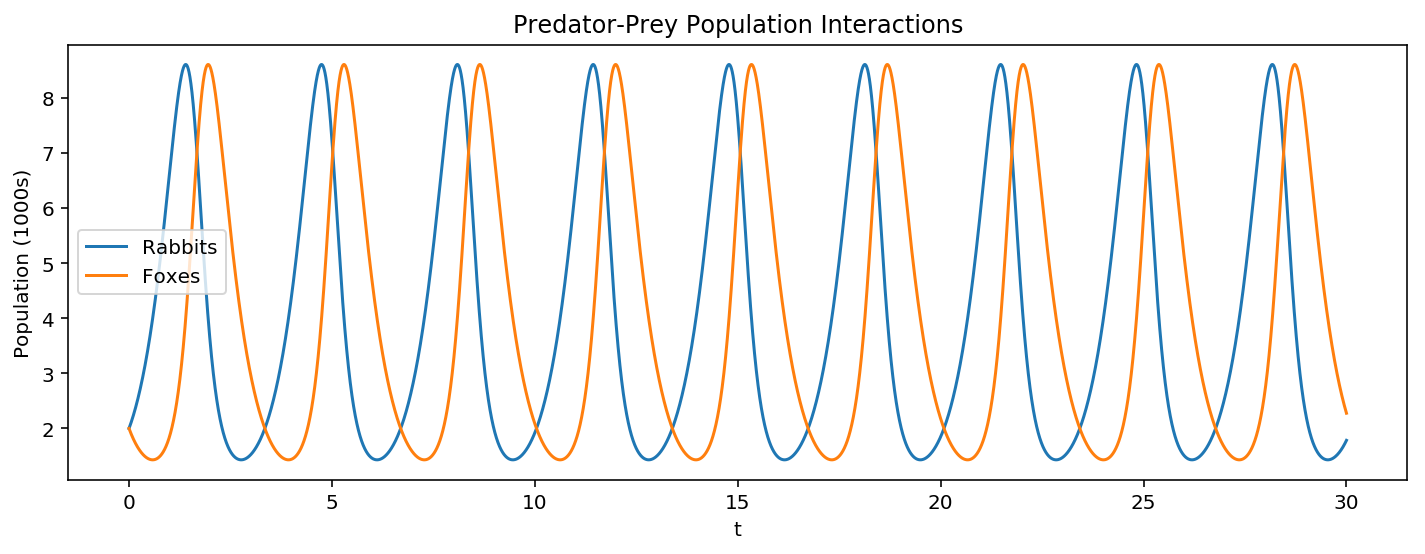

In [4]:
#initial conditions
a = 2
b = 0.5
c = 0.5
d = 2

def f(r,t):
    x = r[0]
    y = r[1]
    fx = a*x - b*x*y
    fy = c*x*y - d*y
    return np.array([fx,fy],float)

t0 = 0.0
t1 = 30.0
N = 1e5
h = (t1-t0)/N

tpoints = np.arange(t0,t1,h)
xpoints = []
ypoints = []
#initial conditions
x = 2.0
y = 2.0
r = np.array([x,y],float)

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h * f(r, t)
    k2 = h * f(r+0.5*k1, t+0.5*h)
    k3 = h * f(r+0.5*k2, t+0.5*h)
    k4 = h * f(r+k3, t+h)
    r += (k1 + 2*k2 + 2*k3 + k4) / 6

    
fig2, ax2 = plt.subplots(1, 1, figsize = (12, 4))

ax2.plot(tpoints,xpoints, label='Rabbits')
ax2.plot(tpoints,ypoints, label='Foxes')
ax2.set_xlabel("t")
ax2.set_ylabel("Population (1000s)")
ax2.set_title("Predator-Prey Population Interactions")
ax2.legend()
plt.show()

In this system, the populations of rabbits and foxes both depend on the population of the other. Specifically, the fox population grows rapidly as the number of rabbits increase because they have more food, but this in turn kills off the rabbit population as the foxes eat them. Thus, the foxes lose sources of food and cannot support as large of a population anymore. This is what accounts for the time-offet in the two populations' periodicity. The populations are held in check and never exceed a maximum that is dependent only on the initial conditions (populations, birth/death rates, and consumption rates).

# CP 8.3 The Lorenz equation

The Lorenz equations are a set of simultaneous ODEs given by

$${\text{d} x\over\text{d} t} = \sigma(y-x),\qquad
{\text{d} y\over\text{d} t} = rx - y - xz,\qquad
{\text{d} z\over\text{d} t} = xy - bz.
$$

These equations provide an example of deterministic chaos, the presence of seemingly random motion of the solutions despite a lack of randomness baked in to the three equations.

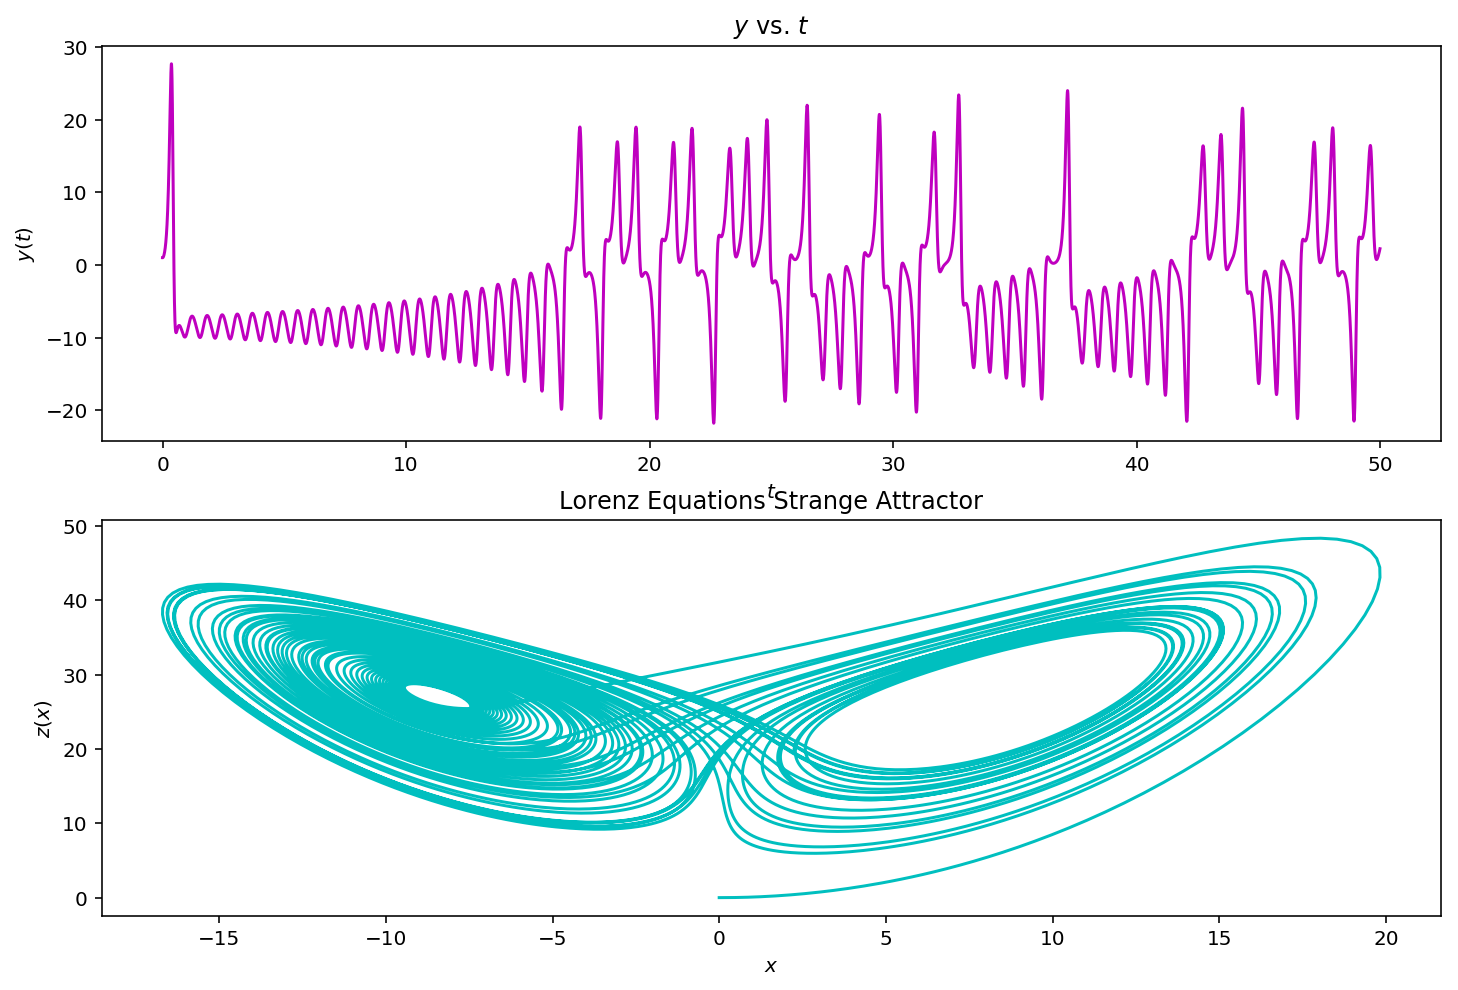

In [5]:
#initial conditions
sigma = 10
r = 28
b = 8/3

def f(s,t):
    x = s[0]
    y = s[1]
    z = s[2]
    fx = sigma * (y - x)
    fy = r*x - y - x*z
    fz = x*y - b*z
    return np.array([fx,fy,fz],float)

t0 = 0.0
t1 = 50.0
N = 1e4
h = (t1-t0)/N

tpoints = np.arange(t0,t1,h)
xpoints = []
ypoints = []
zpoints = []
#initial conditions
s = np.array([0,1,0],float)

for t in tpoints:
    xpoints.append(s[0])
    ypoints.append(s[1])
    zpoints.append(s[2])
    k1 = h * f(s, t)
    k2 = h * f(s+0.5*k1, t+0.5*h)
    k3 = h * f(s+0.5*k2, t+0.5*h)
    k4 = h * f(s+k3, t+h)
    s += (k1 + 2*k2 + 2*k3 + k4) / 6

    
fig3, ax3 = plt.subplots(2, 1, figsize = (12, 8))

ax3[0].plot(tpoints,ypoints,'m')
ax3[0].set_xlabel("$t$")
ax3[0].set_ylabel("$y(t)$")
ax3[0].set_title("$y$ vs. $t$")

ax3[1].plot(xpoints,zpoints,'c')
ax3[1].set_xlabel("$x$")
ax3[1].set_ylabel("$z(x)$")
ax3[1].set_title("Lorenz Equations Strange Attractor")

plt.show()

# CP 8.7 Trajectory with air resistance

We can write out the equations of motion for a particle moving through air based on the two fores acting on. It is being accelerated downward by a force $F = mg$ and it is being decelerated in the direction of motion by a force $$F_d = \tfrac12 \pi R^2\rho C v^2.$$

We can derive the equations of motion in the $x$ and $y$ directions by looking at the components of each force in the respective directions.

\begin{equation}
\sum F_x = ma_x = -F_d \cos\theta \qquad \qquad \qquad \sum F_y = ma_y = -mg - F_d \sin\theta \\
ma_x = -\tfrac12 \pi R^2\rho C\ \bigr(v^2\cos\theta\bigr) \qquad \qquad \qquad ma_y = -mg -\tfrac12 \pi R^2\rho C\ \bigr(v^2\sin\theta\bigr)\\
ma_x = -\tfrac12 \pi R^2\rho Cv \bigr(v\cos\theta\bigr) \qquad \qquad \qquad ma_y = -mg -\tfrac12 \pi R^2\rho Cv \bigr(v\sin\theta\bigr)\\
ma_x = -\tfrac12 \pi R^2\rho C\ v\cdot v_x \qquad \qquad \qquad ma_y = -mg -\tfrac12 \pi R^2\rho C\ v\cdot v_y\\
m\ddot{x} = -\tfrac12 \pi R^2\rho C\dot{x}\sqrt{\dot{x}^2 + \dot{y}^2} \qquad \qquad \qquad m\ddot{y} = -mg-\tfrac12 \pi R^2\rho C\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}\\
\ddot{x} = -\frac{\pi R^2\rho C}{2m}\dot{x}\sqrt{\dot{x}^2 + \dot{y}^2} \qquad \qquad \qquad \ddot{y} = -g -\frac{\pi R^2\rho C}{2m}\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}
\end{equation}

These final two equations can be converted into four first order ODEs that we can solve as a simultaneous system of differential equations.

\begin{equation}
\dot{x} = v_x\\
\dot{y} = v_y\\
\dot{v}_x = -\frac{\pi R^2\rho C}{2m}v_x\sqrt{v_x^2 + v_y^2}\\
\dot{v}_y = -g -\frac{\pi R^2\rho C}{2m}v_y\sqrt{v_x^2 + v_y^2}
\end{equation}

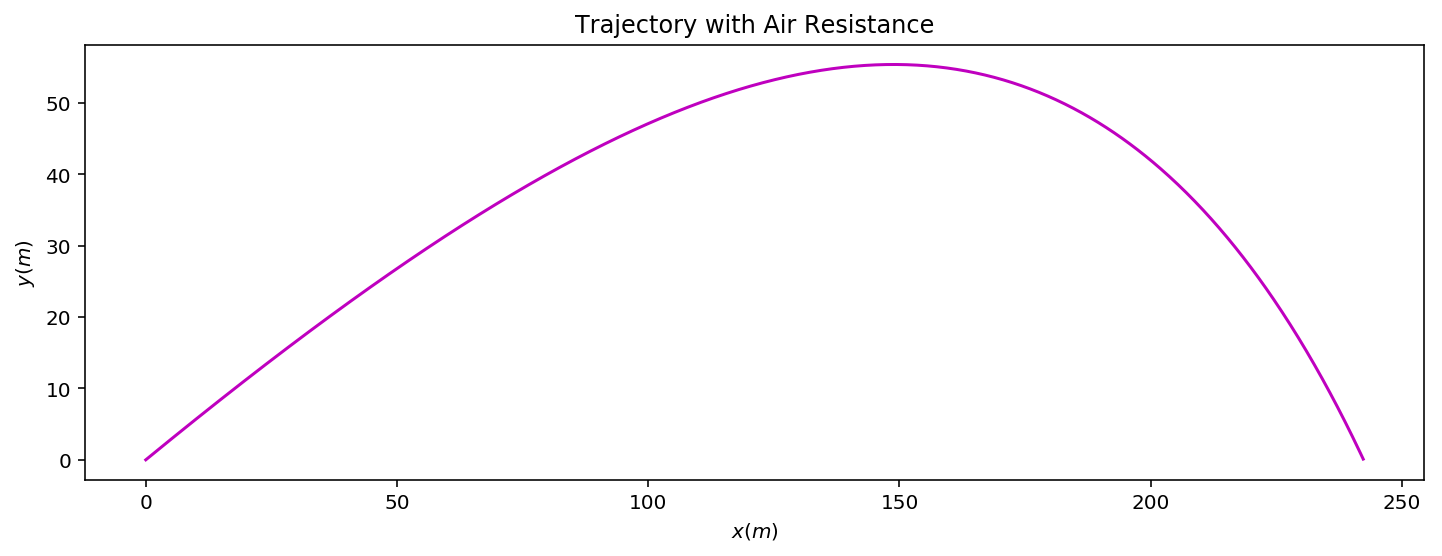

The range for a 1 kg cannonball is 242.30 m.


In [6]:
#initial conditions
m = 1 #kg
R = 0.08 #m
theta = pi / 6 #radians
v0 = 100 # ms^-1
rho = 1.22 #kg m^-3
C = 0.47
g = con.g

const = (pi * R**2 * rho * C) / (2*m)

def f(s,t):
    x = s[0]
    y = s[1]
    vx = s[2]
    vy = s[3]
    
    fx = vx
    fy = vy
    fvx = -const * vx * sqrt(vx**2 + vy**2)
    fvy = -g - (const * vy * sqrt(vx**2 + vy**2))
    return np.array([fx,fy,fvx,fvy],float)

t0 = 0.0
t1 = 10.0
N = 1e3
h = (t1-t0)/N

tpoints = np.arange(t0,t1,h)
xpoints = []
ypoints = []
dxpoints = []
dypoints = []
#initial conditions
s = np.array([0,0,v0*cos(theta),v0*sin(theta)],float)

for t in tpoints:
    xpoints.append(s[0])
    ypoints.append(s[1])
    dxpoints.append(s[2])
    dypoints.append(s[3])
    k1 = h * f(s, t)
    k2 = h * f(s+0.5*k1, t+0.5*h)
    k3 = h * f(s+0.5*k2, t+0.5*h)
    k4 = h * f(s+k3, t+h)
    s += (k1 + 2*k2 + 2*k3 + k4) / 6
    
    if s[1] < 0:
        break

    
fig4, ax4 = plt.subplots(1, 1, figsize = (12, 4))

ax4.plot(xpoints,ypoints,'m')
ax4.set_xlabel("$x (m)$")
ax4.set_ylabel("$y (m)$")
ax4.set_title("Trajectory with Air Resistance")

plt.show()

print("The range for a {:1} kg cannonball is {:4.2f} m."\
     .format(m,xpoints[-1]))

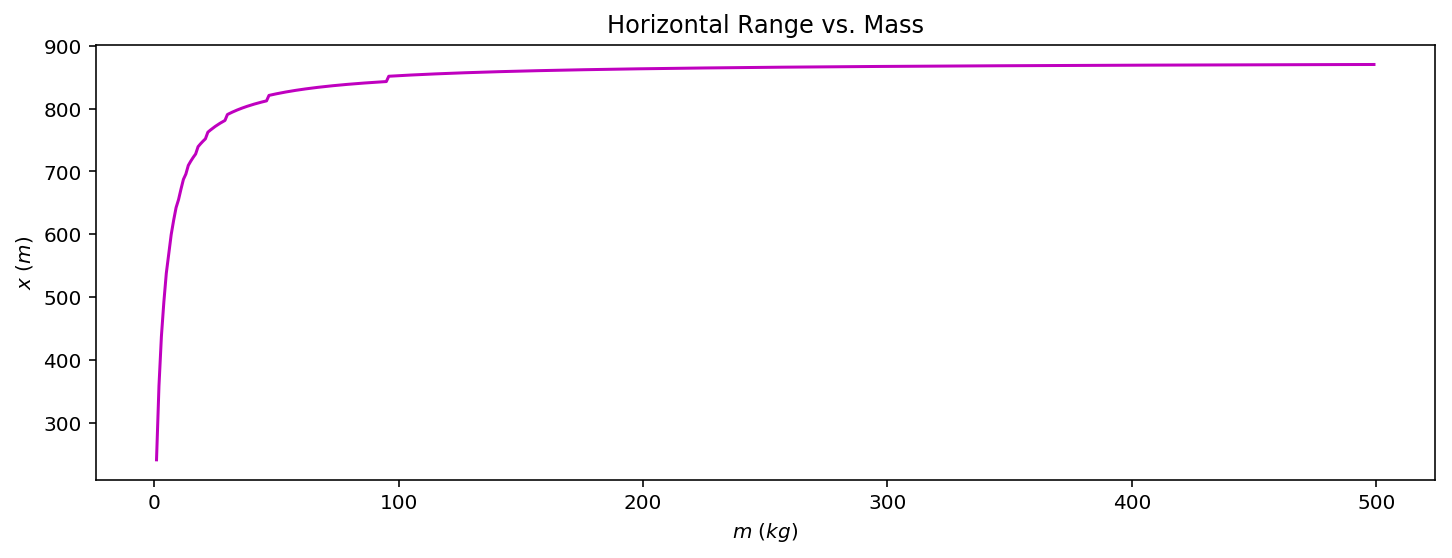

In [7]:
#initial conditions
R = 0.08 #m
theta = pi / 6 #radians
v0 = 100 # ms^-1
rho = 1.22 #kg m^-3
C = 0.47
g = con.g

def f(s,t):
    x = s[0]
    y = s[1]
    vx = s[2]
    vy = s[3]
    
    fx = vx
    fy = vy
    fvx = -const * vx * sqrt(vx**2 + vy**2)
    fvy = -g - (const * vy * sqrt(vx**2 + vy**2))
    return np.array([fx,fy,fvx,fvy],float)

t0 = 0.0
t1 = 100.0
N = 1e3
h = (t1-t0)/N

tpoints = np.arange(t0,t1,h)
#mpoints = tpoints
mpoints = np.arange(1,500,1)
hrange = []

fig5, ax5 = plt.subplots(1, 1, figsize = (12, 4))

for m in range(len(mpoints)):
    const = (pi * R**2 * rho * C) / (2*mpoints[m])

    xpoints = []
    ypoints = []
    dxpoints = []
    dypoints = []
    #initial conditions
    s = np.array([0,0,v0*cos(theta),v0*sin(theta)],float)

    for t in tpoints:
        xpoints.append(s[0])
        ypoints.append(s[1])
        dxpoints.append(s[2])
        dypoints.append(s[3])
        k1 = h * f(s, t)
        k2 = h * f(s+0.5*k1, t+0.5*h)
        k3 = h * f(s+0.5*k2, t+0.5*h)
        k4 = h * f(s+k3, t+h)
        s += (k1 + 2*k2 + 2*k3 + k4) / 6

        if s[1] < 0:
            hrange.append(xpoints[-1])
            break

ax5.plot(mpoints,hrange,'m')
ax5.set_xlabel("$m\ (kg)$")
ax5.set_ylabel("$x\ (m)$")
ax5.set_title("Horizontal Range vs. Mass")

plt.show()

Range increases with mass and asymptotically approaches a limit. This limit is given by the range that the projectile would have if drag due to the air were not taken into account. This is because as mass increases, the terms in the equations of motion corresponding to drag disappear until the equations of motion are

$$\ddot{x} = 0\ \text{ and } \ \ddot{y} = -g.$$

Solving these gives the theoretical range

$$ R = \frac{v_0^2\sin2\theta}{g} = 883.1\ \text{m},$$

where $v_0$ and $\theta$ are the initial speed and the launch angle, respectively.

In [8]:
100**2*sin(pi/3)/g

883.1

# CP 8.16 Three body problem

This problem models the movement of three stars initially at rest lying in the $x-y$ plane. The equation of motion for star 1 $m_1$ can be derive from the force equation given by gravity.

\begin{equation}
\mathbf{F} = m_1\mathbf{a}_1 = Gm_1m_2\frac{\mathbf{r}_2 - \mathbf{r}_1}{|\mathbf{r}_2 - \mathbf{r}_1|^3} + Gm_1m_3\frac{\mathbf{r}_3 - \mathbf{r}_1}{|\mathbf{r}_3 - \mathbf{r}_1|^3}\\
\mathbf{a}_1 = \frac{\text{d}^2\mathbf{r}_1}{\text{d}t^2} = Gm_2\frac{\mathbf{r}_2 - \mathbf{r}_1}{|\mathbf{r}_2 - \mathbf{r}_1|^3} + Gm_3\frac{\mathbf{r}_3 - \mathbf{r}_1}{|\mathbf{r}_3 - \mathbf{r}_1|^3}\\
\end{equation}

So, we can write the analogous equations of motion for Stars 2 and 3 respectively as

$$\frac{\text{d}^2\mathbf{r}_2}{\text{d}t^2} = Gm_1\frac{\mathbf{r}_1 - \mathbf{r}_2}{|\mathbf{r}_1 - \mathbf{r}_2|^3} + Gm_3\frac{\mathbf{r}_3 - \mathbf{r}_2}{|\mathbf{r}_3 - \mathbf{r}_2|^3} \qquad \text{ and } \qquad \frac{\text{d}^2\mathbf{r}_3}{\text{d}t^2} = Gm_1\frac{\mathbf{r}_1 - \mathbf{r}_3}{|\mathbf{r}_1 - \mathbf{r}_3|^3} + Gm_2\frac{\mathbf{r}_2 - \mathbf{r}_3}{|\mathbf{r}_2 - \mathbf{r}_3|^3}.$$

These can be converted into the following six first order differential equations that we can solve simultaneously

\begin{equation}
v_1 = \dot{\mathbf{r}}_1\\
v_2 = \dot{\mathbf{r}}_2\\
v_3 = \dot{\mathbf{r}}_3\\
\dot{v}_1 = Gm_2\frac{\mathbf{r}_2 - \mathbf{r}_1}{|\mathbf{r}_2 - \mathbf{r}_1|^3} + Gm_3\frac{\mathbf{r}_3 - \mathbf{r}_1}{|\mathbf{r}_3 - \mathbf{r}_1|^3}\\
\dot{v}_2 = Gm_1\frac{\mathbf{r}_1 - \mathbf{r}_2}{|\mathbf{r}_1 - \mathbf{r}_2|^3} + Gm_3\frac{\mathbf{r}_3 - \mathbf{r}_2}{|\mathbf{r}_3 - \mathbf{r}_2|^3}\\
\dot{v}_3 = Gm_1\frac{\mathbf{r}_1 - \mathbf{r}_3}{|\mathbf{r}_1 - \mathbf{r}_3|^3} + Gm_2\frac{\mathbf{r}_2 - \mathbf{r}_3}{|\mathbf{r}_2 - \mathbf{r}_3|^3}.\\
\end{equation}

In the program, the function set up to return the right hand sides of the above equations will call a matrix $\mathbf{s}$ as its first argument where

$$\mathbf{s} = \begin{pmatrix}
- & \mathbf{r}_1 & -\\
- & \mathbf{r}_2 & -\\
- & \mathbf{r}_3 & -\\
- & \dot{\mathbf{r}}_1 & -\\
- & \dot{\mathbf{r}}_2 & -\\
- & \dot{\mathbf{r}}_3 & -\\
\end{pmatrix} = \begin{pmatrix}
x_1 & y_1\\
x_2 & y_2\\
x_3 & y_3\\
\dot{x}_1 & \dot{y}_1\\
\dot{x}_2 & \dot{y}_2\\
\dot{x}_3 & \dot{y}_3
\end{pmatrix}.$$

Then given the initial positions and velocities provided in the problem

$$\mathbf{s}\ \lvert_{t=0}\ =\ \begin{pmatrix}
3 & 1\\
-1 & -2\\
-1 & 1\\
0 & 0\\
0 & 0\\
0 & 0
\end{pmatrix},$$

we use the adpative step method to find the positions as they change over time. The adaptive step method is used because greater granularity is required when the stars are close together because the accelerations are changing more rapidly than when they are farther away from each other.

In [9]:
def f(s,t):
    r1 = s[0,:]
    r2 = s[1,:]
    r3 = s[2,:]
    v1 = s[3,:]
    v2 = s[4,:]
    v3 = s[5,:]


    fr1 = v1
    fr2 = v2
    fr3 = v3
    fv1 = m2*(r2-r1)/((LA.norm(r2-r1))**3)\
        + m3*(r3-r1)/((LA.norm(r3-r1))**3)

    fv2 = m1*(r1-r2)/((LA.norm(r1-r2))**3)\
        + m3*(r3-r2)/((LA.norm(r3-r2))**3)

    fv3 = m1*(r1-r3)/((LA.norm(r1-r3))**3)\
        + m2*(r2-r3)/((LA.norm(r2-r3))**3)

    return np.array([fr1,fr2,fr3,fv1,fv2,fv3],float)

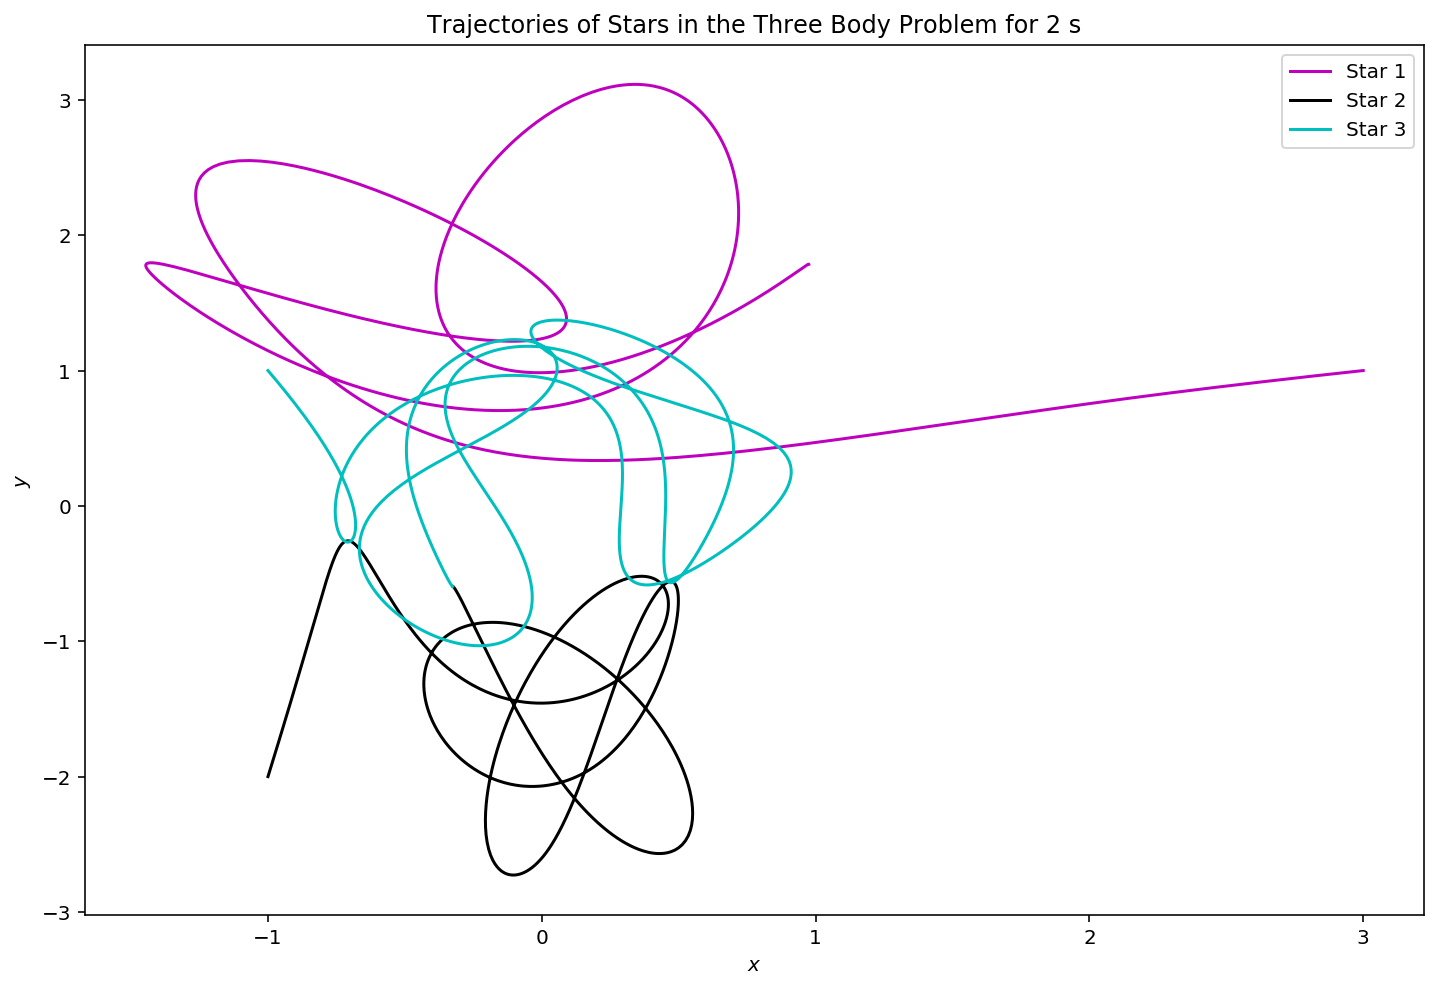

CPU times: user 13.3 s, sys: 144 ms, total: 13.5 s
Wall time: 13.9 s


In [10]:
%%time

#initial conditions
m1 = 150
m2 = 200
m3 = 250
s = np.array([[3,1],
              [-1,-2],
              [-1,1],
              [0,0],
              [0,0],
              [0,0]],float)

t0 = 0.0
dt = 1e-6 #target accuracy per unit time
t1 = 2.0
N = 1e4
h = (t1-t0)/N #starting step size

tpoints = np.arange(t0,t1,h)
x1 = []
x2 = []
x3 = []
y1 = []
y2 = []
y3 = []

x1.append(s[0,0])
x2.append(s[1,0])
x3.append(s[2,0])
y1.append(s[0,1])
y2.append(s[1,1])
y3.append(s[2,1])

for t in tpoints:
    rho = 0.5 #dummy value to start

    #steps need to be redone if rho too small
    while rho < 1:
        
        #estimates x(t+2h) in two steps (x_1)
        s1 = np.copy(s)

        k1 = h * f(s1, t)
        k2 = h * f(s1+0.5*k1, t+0.5*h)
        k3 = h * f(s1+0.5*k2, t+0.5*h)
        k4 = h * f(s1+k3, t+h)
        s1 += (k1 + 2*k2 + 2*k3 + k4) / 6

        k1 = h * f(s1, t)
        k2 = h * f(s1+0.5*k1, t+0.5*h)
        k3 = h * f(s1+0.5*k2, t+0.5*h)
        k4 = h * f(s1+k3, t+h)
        s1 += (k1 + 2*k2 + 2*k3 + k4) / 6

        #estimates x(t+2h) in one step (x_2)
        s2 = np.copy(s)

        k1 = 2*h * f(s, t)
        k2 = 2*h * f(s+0.5*k1, t+h)
        k3 = 2*h * f(s+0.5*k2, t+h)
        k4 = 2*h * f(s+k3, t+2*h)
        s2 += (k1 + 2*k2 + 2*k3 + k4) / 6

        #calculates joint error in two dimensions
        epsilon_x = (s1[:,0]-s2[:,0]) / 30
        epsilon_y = (s1[:,1]-s2[:,1]) / 30
        error = np.sqrt(np.square(epsilon_x)\
              + np.square(epsilon_y))

        #bounds step size h
        for i in range(len(error)):
            if error[i] < 1e-15:
                error[i] = h*dt/2**4

        #definition of multipart error from book
        rho = h*dt/error

        rho = np.min(rho)
        if rho > 2**4:
            rho = 2**4
        #adjusts step size
        h *= rho**(1/4)

    s = np.copy(s1)
    x1.append(s[0,0])
    x2.append(s[1,0])
    x3.append(s[2,0])
    y1.append(s[0,1])
    y2.append(s[1,1])
    y3.append(s[2,1])


fig6, ax6 = plt.subplots(1, 1, figsize = (12, 8))

ax6.plot(x1,y1,'m', label='Star 1')
ax6.plot(x2,y2,'k', label='Star 2')
ax6.plot(x3,y3,'c', label='Star 3')
ax6.set_xlabel("$x$")
ax6.set_ylabel("$y$")
ax6.set_title(\
    "Trajectories of Stars in the Three Body Problem for 2 s")
ax6.legend()
plt.show()

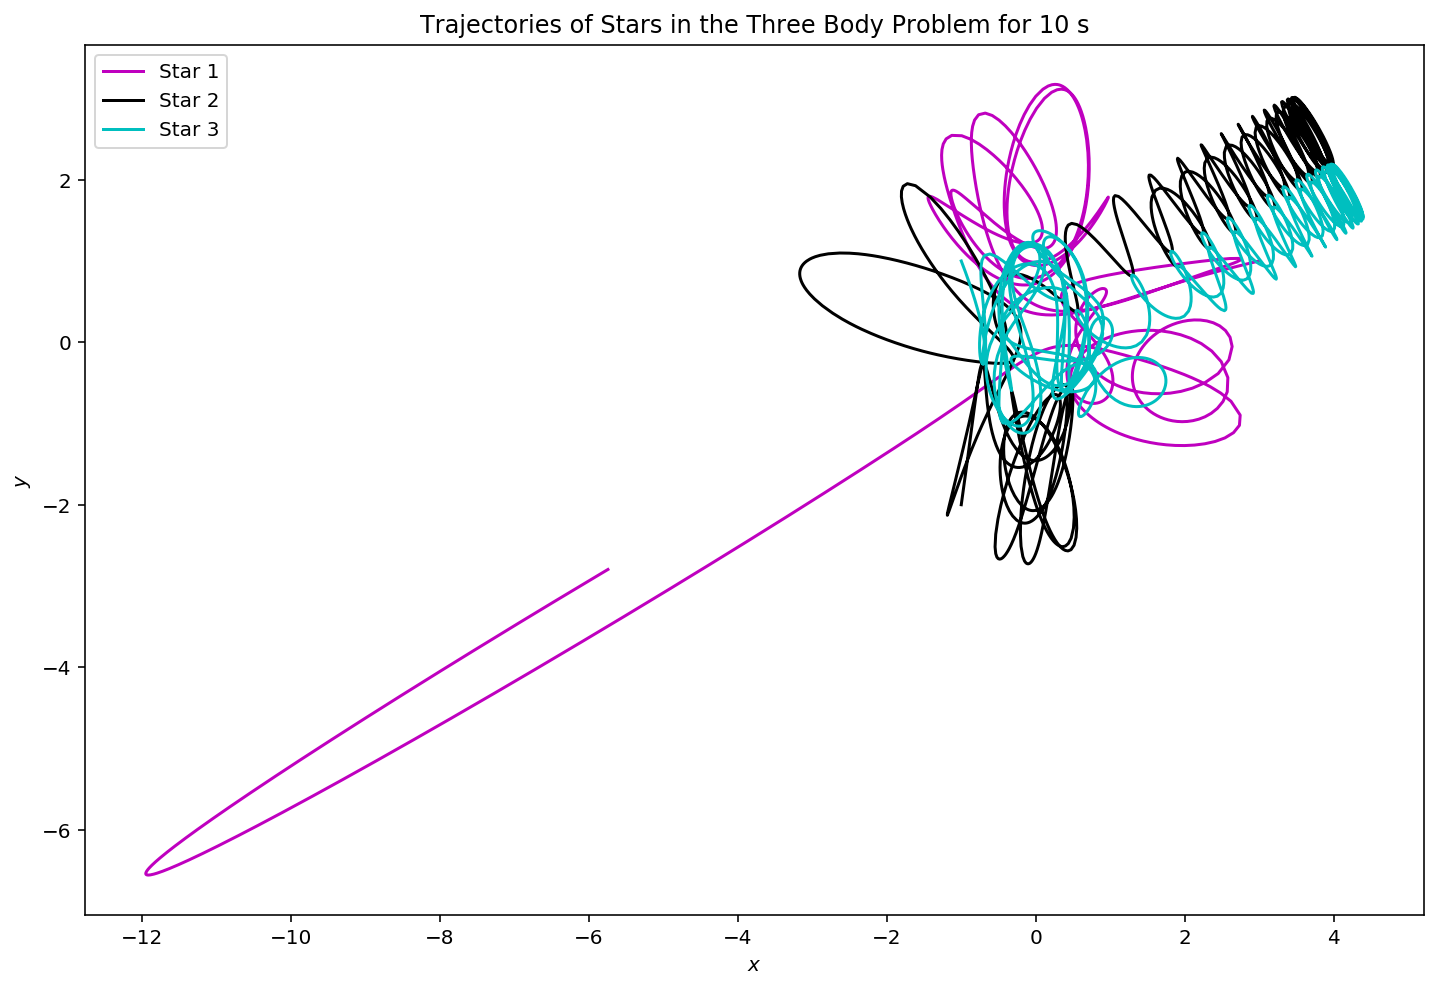

In [11]:
#initial conditions
m1 = 150
m2 = 200
m3 = 250
s = np.array([[3,1],
              [-1,-2],
              [-1,1],
              [0,0],
              [0,0],
              [0,0]],float)

t0 = 0.0
dt = 1e-4 #target accuracy per unit time
t1 = 10.0
N = 1e4
h = (t1-t0)/N #starting step size

tpoints = np.arange(t0,t1,h)
x1 = []
x2 = []
x3 = []
y1 = []
y2 = []
y3 = []

x1.append(s[0,0])
x2.append(s[1,0])
x3.append(s[2,0])
y1.append(s[0,1])
y2.append(s[1,1])
y3.append(s[2,1])

while t0 < t1:
    for t in tpoints:
        rho = 0.5 #dummy value to start

        #steps need to be redone if rho too small
        while rho < 1:

            #estimates x(t+2h) in two steps (x_1)
            s1 = np.copy(s)

            k1 = h * f(s1, t)
            k2 = h * f(s1+0.5*k1, t+0.5*h)
            k3 = h * f(s1+0.5*k2, t+0.5*h)
            k4 = h * f(s1+k3, t+h)
            s1 += (k1 + 2*k2 + 2*k3 + k4) / 6

            k1 = h * f(s1, t)
            k2 = h * f(s1+0.5*k1, t+0.5*h)
            k3 = h * f(s1+0.5*k2, t+0.5*h)
            k4 = h * f(s1+k3, t+h)
            s1 += (k1 + 2*k2 + 2*k3 + k4) / 6

            #estimates x(t+2h) in one step (x_2)
            s2 = np.copy(s)

            k1 = 2*h * f(s, t)
            k2 = 2*h * f(s+0.5*k1, t+h)
            k3 = 2*h * f(s+0.5*k2, t+h)
            k4 = 2*h * f(s+k3, t+2*h)
            s2 += (k1 + 2*k2 + 2*k3 + k4) / 6

            #calculates joint error in two dimensions
            epsilon_x = (s1[:,0]-s2[:,0]) / 30
            epsilon_y = (s1[:,1]-s2[:,1]) / 30
            error = np.sqrt(np.square(epsilon_x)\
                  + np.square(epsilon_y))

            #bounds step size h
            for i in range(len(error)):
                if error[i] < 1e-15:
                    error[i] = h*dt/2**4

            #definition of multipart error from book
            rho = h*dt/error

            rho = np.min(rho)
            if rho > 2**4:
                rho = 2**4

            if rho > 1:
                t0 += 2*h
            #adjusts step size
            h *= rho**(1/4)

        s = np.copy(s1)
        x1.append(s[0,0])
        x2.append(s[1,0])
        x3.append(s[2,0])
        y1.append(s[0,1])
        y2.append(s[1,1])
        y3.append(s[2,1])


fig6, ax6 = plt.subplots(1, 1, figsize = (12, 8))

ax6.plot(x1,y1,'m', label='Star 1')
ax6.plot(x2,y2,'k', label='Star 2')
ax6.plot(x3,y3,'c', label='Star 3')
ax6.set_xlabel("$x$")
ax6.set_ylabel("$y$")
ax6.set_title(\
    "Trajectories of Stars in the Three Body Problem for 10 s")
ax6.legend()
plt.show()